In [1]:
import matplotlib.pyplot as plt
import pickle
import csv
import pandas as pd
import ast
import string

In [ ]:
%run 'get_metrics/get_surprisal.py'

In [36]:
langs = ['bg', 'be', 'cs', 'pl', 'uk']
models = ['model_gpt_small', 'model_bert_small', 'model_gpt_large', 'model_bert_large']

In [60]:
import matplotlib.pyplot as plt

def plot_surprisal(sentence1, sentence2, model):
    '''
    Plot surprisal in comparison
    '''
    data1 = calculate_surprisal(sentence1, model)
    data2 = calculate_surprisal(sentence2, model)
    # Generic function to create a plot
    def create_plot(ax, data, title):
        x = range(len(data))
        y = [t for t in data.values()]
        labels = [t for t in data.keys()]

        ax.plot(x, y, 'o', linestyle='-')

        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation='vertical', fontsize=20)
        ax.set_xlabel('Sentence', fontsize=24)
        ax.set_ylabel('Surprisal Score', fontsize=24)
        ax.set_title(title, fontsize=20)
        ax.set_ylim(0, 12)  # Setting the y-axis limit to 12

        for i, txt in enumerate(labels):
            ax.annotate(txt, (x[i], y[i]), fontsize=20, ha='center')

    # Create two side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 10))

    create_plot(ax1, data1, 'Plot of Surprisal by Words (ruRoBERTa) CS - Dataset 1')
    create_plot(ax2, data2, 'Plot of Surprisal by Words (ruRoBERTa) CS - Dataset 2')

    plt.tight_layout()
    plt.show()

In [54]:
data1 = calculate_surprisal('мне сказали что они идут', model_bert_small)
data2 = calculate_surprisal('мне сказали что они идет', model_bert_small)

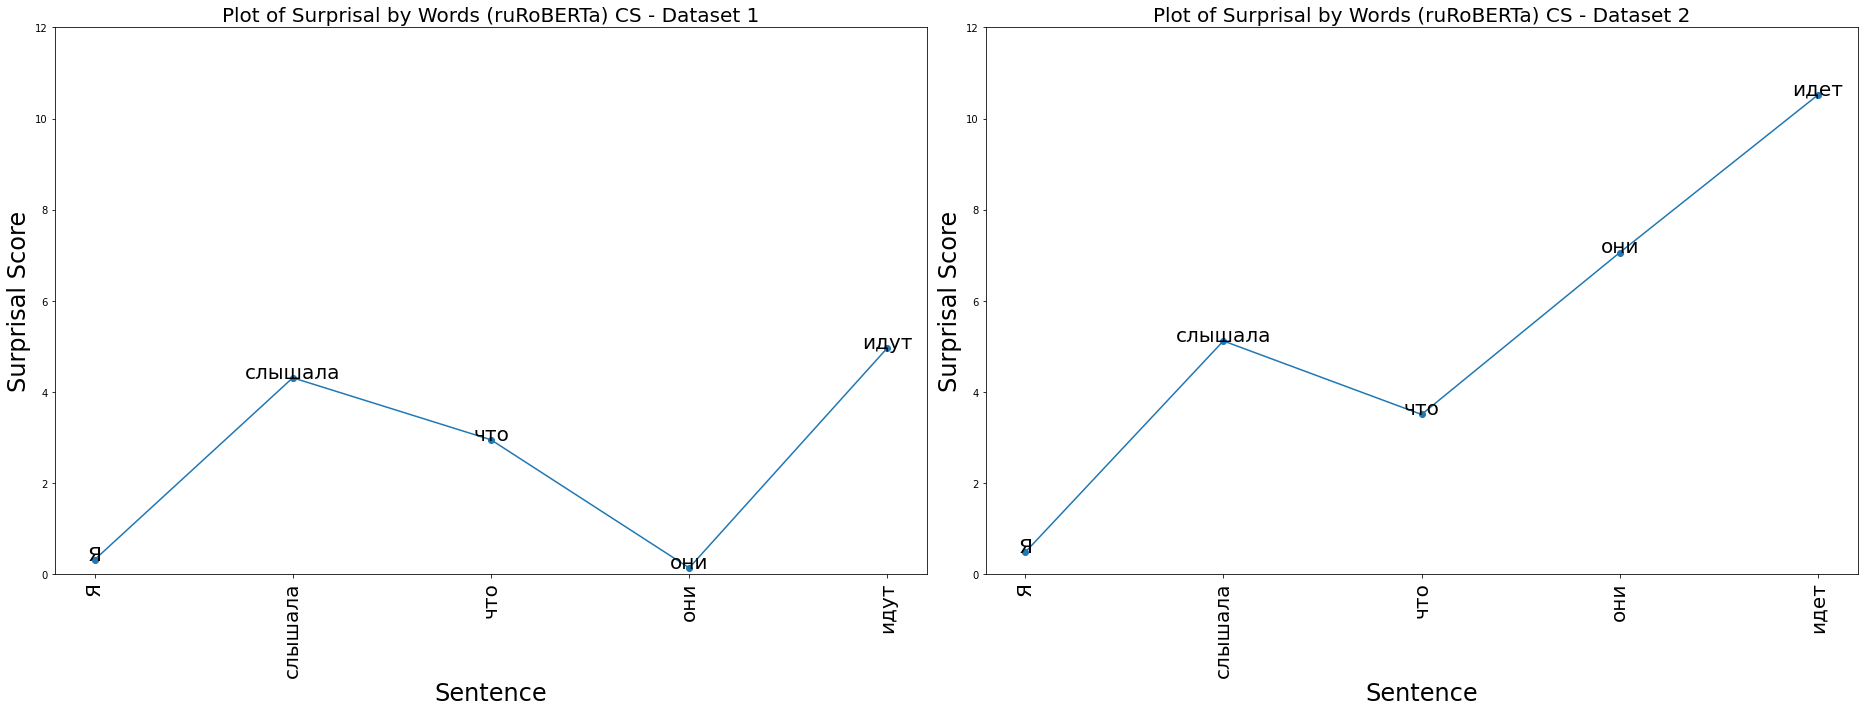

In [62]:
plot_surprisal('Я слышала что они идут', 'Я слышала что они идет', model_bert_large)

In [57]:
 model_gpt_large.token_score('далее он ушел', surprisal=True, base_two=False)

[[('далее', 0.0), ('он', 6.822457790374756), ('ушел', 8.412764549255371)]]

In [43]:
by_cat = dict()
for lang in ['bg', 'be', 'cs', 'pl', 'uk']:
    with open(f'data/by_category/mcus_{lang}.p', 'rb') as handle:
        by_cat[lang] = pickle.load(handle)

In [143]:
results = {}

columns = ['phrase ru', 'surprisal_sentence ru', 'literal translation', 'surprisal_phrase ru with literal']

for lang in langs:
    for model_name in models:
        file_path = f"data/metrics/surprisal/{lang}_{model_name}_data.csv"
        
        # Load the data into a DataFrame
        df = pd.read_csv(file_path, usecols=columns)
        
        # Filter out rows where any of the desired columns are missing
        df = df.dropna(subset=columns)
        
        # Save to the results dictionary
        results[(lang, model_name)] = df

In [144]:
# Extending the punctuation list
extended_punctuation = string.punctuation + '…'

# Updated function to remove punctuation from a given word
def remove_punctuation(word):
    return ''.join(ch for ch in word if ch not in extended_punctuation)

# Updated function to compute average surprisal
def compute_average_surprisal(phrase, surprisal_str):
    try:
        # Convert string to dictionary
        surprisal_dict = ast.literal_eval(surprisal_str)
        # Clean keys in surprisal_dict (removing punctuation)
        surprisal_dict = {remove_punctuation(key): value for key, value in surprisal_dict.items()}
        # Get the tokens from the phrase
        tokens = remove_punctuation(phrase).split()
        # Compute average surprisal for the tokens in the phrase
        total_surprisal = sum(surprisal_dict.get(token, float('nan')) for token in tokens)
        return total_surprisal / len(tokens)
    except (ValueError, SyntaxError):
        return float('nan')

for key, df in results.items():
    # Calculate average surprisal for 'phrase ru'
    df['avg_surprisal_phrase ru'] = df.apply(lambda row: compute_average_surprisal(row['phrase ru'], row['surprisal_sentence ru']), axis=1)
    # Calculate average surprisal for 'literal translation'
    df['avg_surprisal_literal'] = df.apply(lambda row: compute_average_surprisal(row['literal translation'], row['surprisal_phrase ru with literal']), axis=1)


In [145]:
for (lang, model_name), df in results.items():
    df['avg_surprisal_phrase ru'] = df['avg_surprisal_phrase ru'].fillna(0.0)
    df['avg_surprisal_literal'] = df['avg_surprisal_literal'].fillna(0.0)

In [122]:
import pandas as pd

# Languages in the study based on the previous code
languages = ['BG', 'BE', 'CS', 'PL', 'UK']  # Using uppercase since that's how they seem to be in your previous code

# Initialize a dictionary to store the dataframes
was_data = {}

# For each language, load the data for both directions and their "fixed" variants
for l2 in languages:
    l2_lower = l2.lower()
    
    # Load RU to L2 data
    ru_l2_df = pd.read_csv(f'data/metrics/was/was_literal_ru_{l2_lower}.csv')
    ru_l2_fixed_df = pd.read_csv(f'data/metrics/was/was_fixed_ru_{l2_lower}.csv')
    
    # Merge the "fixed" columns into the main DataFrame
    ru_l2_df['normalized WAS fixed'] = ru_l2_fixed_df['normalized WAS']
    was_data[f'ru_{l2_lower}'] = ru_l2_df
    
    # Load L2 to RU data
    l2_ru_df = pd.read_csv(f'data/metrics/was/was_literal_{l2_lower}_ru.csv')
    l2_ru_fixed_df = pd.read_csv(f'data/metrics/was/was_fixed_{l2_lower}_ru.csv')
    
    # Merge the "fixed" columns into the main DataFrame
    l2_ru_df['normalized WAS fixed'] = l2_ru_fixed_df['normalized WAS']
    was_data[f'{l2_lower}_ru'] = l2_ru_df


In [114]:
was_df = plot_df
was_df

,Language,Literal,Fixed
0,bg,3.175256,3.221264
1,be,3.235893,3.249172
2,cs,3.323028,3.382418
3,pl,3.332122,3.388665
4,uk,3.257236,3.298384


In [118]:
pwld_df = agg_df
pwld_df

,Language,Literal,Fixed
0,bg,0.204141,0.252588
1,be,0.212757,0.219716
2,cs,0.174754,0.291087
3,pl,0.207772,0.297607
4,uk,0.197653,0.210293


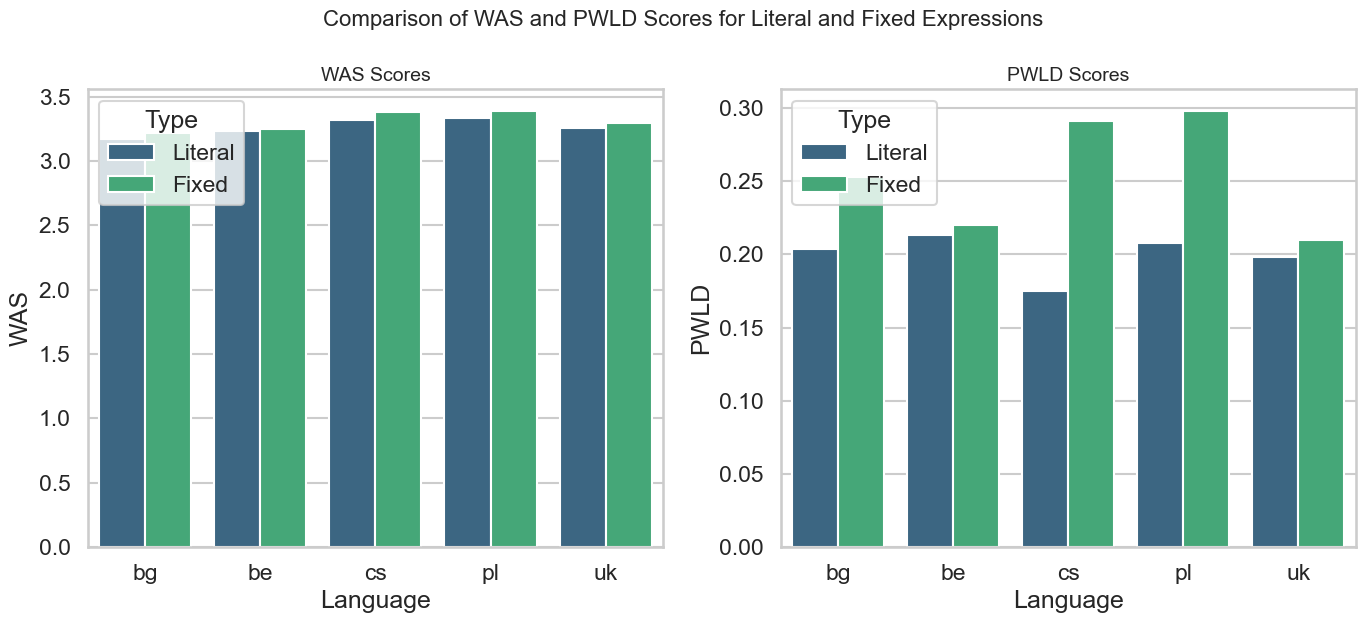

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your data
data_ortho = {
    'Language': ['bg', 'be', 'cs', 'pl', 'uk'],
    'Literal': [3.175, 3.236, 3.323, 3.332, 3.257],
    'Fixed': [3.221, 3.249, 3.382, 3.389, 3.298]
}

data_phono = {
    'Language': ['bg', 'be', 'cs', 'pl', 'uk'],
    'Literal': [0.204, 0.213, 0.175, 0.208, 0.198],
    'Fixed': [0.253, 0.220, 0.291, 0.298, 0.210]
}

# Convert dictionaries to DataFrames
df_ortho = pd.DataFrame(data_ortho)
df_phono = pd.DataFrame(data_phono)

# Melt the DataFrames to long format for easier plotting with seaborn
df_ortho_melted = df_ortho.melt(id_vars='Language', var_name='Type', value_name='WAS')
df_phono_melted = df_phono.melt(id_vars='Language', var_name='Type', value_name='PWLD')

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting
sns.barplot(x='Language', y='WAS', hue='Type', data=df_ortho_melted, ax=axes[0], palette="viridis")
sns.barplot(x='Language', y='PWLD', hue='Type', data=df_phono_melted, ax=axes[1], palette="viridis")

# Adding titles and labels
axes[0].set_title('WAS Scores', fontsize=14)
axes[1].set_title('PWLD Scores', fontsize=14)
axes[0].set_ylabel('WAS')
axes[1].set_ylabel('PWLD')
axes[0].set_xlabel('Language')
axes[1].set_xlabel('Language')

# Adding legends
axes[0].legend(title='Type', loc='upper left')
axes[1].legend(title='Type', loc='upper left')

# Adjusting the layout
plt.tight_layout()
plt.suptitle('Comparison of WAS and PWLD Scores for Literal and Fixed Expressions', fontsize=16, y=1.05)

# Save the plot in a suitable format
plt.savefig("barplot_comparison.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [30]:
# Creating a new column for checking if the translation is correct
experiment_results['is_correct'] = experiment_results['user_mcq_translation'] == experiment_results['correct_translation']

# Counting the number of correct translations by language
correct_counts = experiment_results.groupby('source_language')['is_correct'].sum().reset_index()

# Calculating the percentage of correct translations
total_counts = experiment_results['source_language'].value_counts().reset_index()
total_counts.columns = ['source_language', 'total']
correct_counts = pd.merge(correct_counts, total_counts, on='source_language')
correct_counts['correct_percentage'] = (correct_counts['is_correct'] / correct_counts['total']) * 100

# Sorting the data in descending order based on the percentage of correct translations
correct_counts = correct_counts.sort_values(by='correct_percentage', ascending=False)

# Assuming correct_counts_free is your DataFrame for Free Translation
# Merge the two DataFrames on 'source_language'
merged_counts = pd.merge(correct_counts, correct_counts_free[['source_language', 'correct_percentage_free']], on='source_language')

# Save as LaTeX table
with open('results/correct_translations_table.tex', 'w') as tf:
     tf.write(merged_counts.to_latex(index=False, float_format="%.2f", columns=['source_language', 'correct_percentage', 'correct_percentage_free']))


/var/folders/s6/6r_4f6n16dv6s41vfjb0rqzc0000gn/T/ipykernel_5518/515064411.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(merged_counts.to_latex(index=False, float_format="%.2f", columns=['source_language', 'correct_percentage', 'correct_percentage_free']))


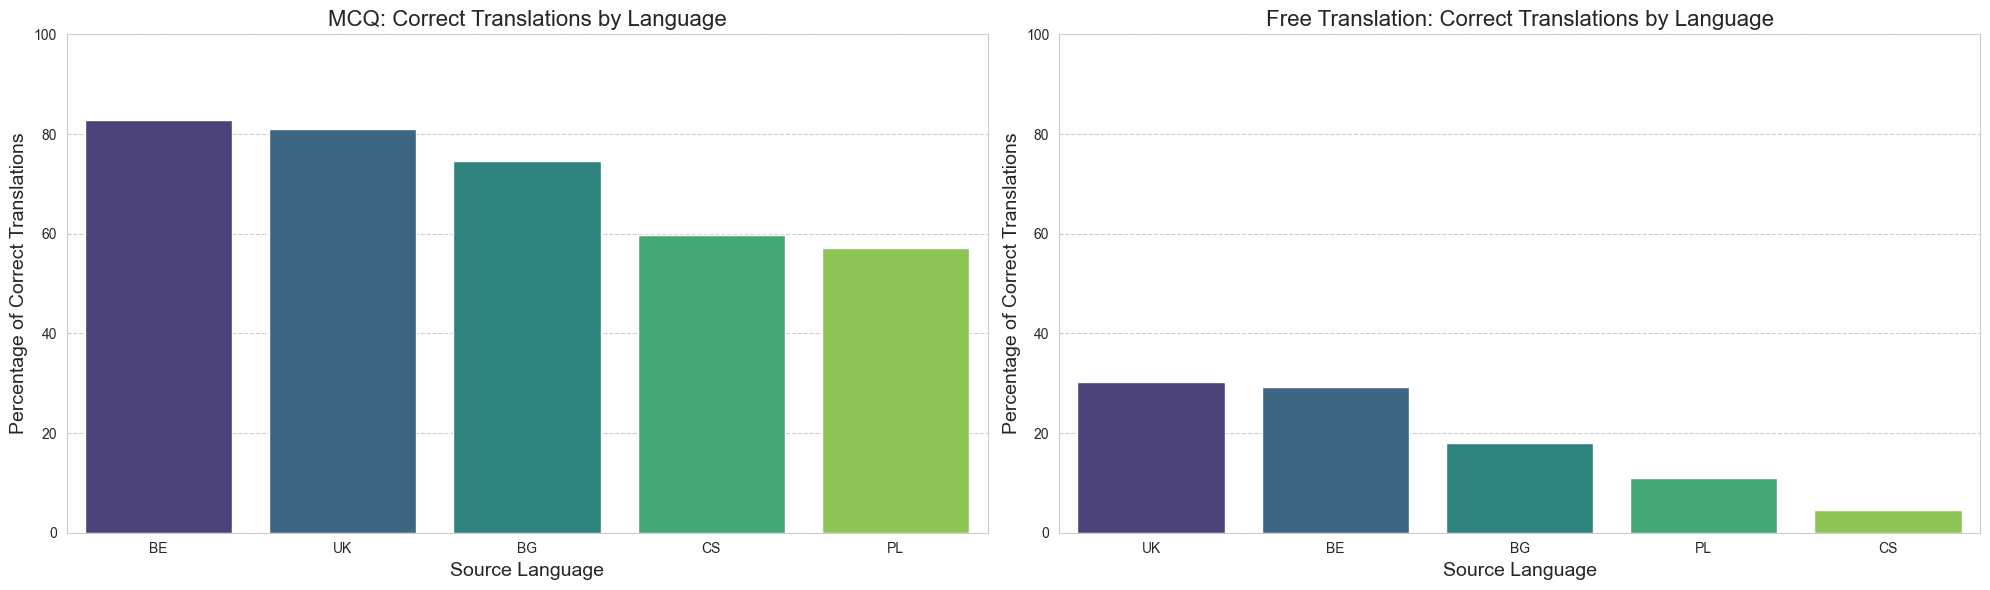

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame: experiment_results

# Creating a new column for checking if the translation is correct for free translation
experiment_results['is_correct_free'] = experiment_results['user_free_translation'] == experiment_results['correct_translation']

# Counting the number of correct translations by language for free translation
correct_counts_free = experiment_results.groupby('source_language')['is_correct_free'].sum().reset_index()

# Calculating the percentage of correct translations for free translation
total_counts = experiment_results['source_language'].value_counts().reset_index()
total_counts.columns = ['source_language', 'total']
correct_counts_free = pd.merge(correct_counts_free, total_counts, on='source_language')
correct_counts_free['correct_percentage_free'] = (correct_counts_free['is_correct_free'] / correct_counts_free['total']) * 100

# Sorting the data in descending order based on the percentage of correct translations for free translation
correct_counts_free = correct_counts_free.sort_values(by='correct_percentage_free', ascending=False)

# Set the aesthetic style of the plots
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--'})

# Create a bar plot
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plot1 = sns.barplot(data=correct_counts, x='source_language', y='correct_percentage', palette='viridis')
plt.title('MCQ: Correct Translations by Language', fontsize=16)
plt.xlabel('Source Language', fontsize=14)
plt.ylabel('Percentage of Correct Translations', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limits to be the same for both plots

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plot2 = sns.barplot(data=correct_counts_free, x='source_language', y='correct_percentage_free', palette='viridis')
plt.title('Free Translation: Correct Translations by Language', fontsize=16)
plt.xlabel('Source Language', fontsize=14)
plt.ylabel('Percentage of Correct Translations', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limits to be the same for both plots

# Save the plot in PGF format
plt.tight_layout()  # Adjusts subplot params for neat layout
plt.savefig("results/correct_translations_comparison.pgf")

# Show the plot
plt.show()


In [19]:
# Sorting by language for demonstration
df = df.sort_values(by='source_language')

# Save as LaTeX table
with open('results/correct_translations_table.tex', 'w') as tf:
     tf.write(df.to_latex(index=False, float_format="%.2f"))

,source_language,is_correct_free,total,correct_percentage_free
0,BE,0,1404,0.0
1,BG,0,1434,0.0
2,CS,0,1465,0.0
3,PL,0,1472,0.0
4,UK,0,1421,0.0


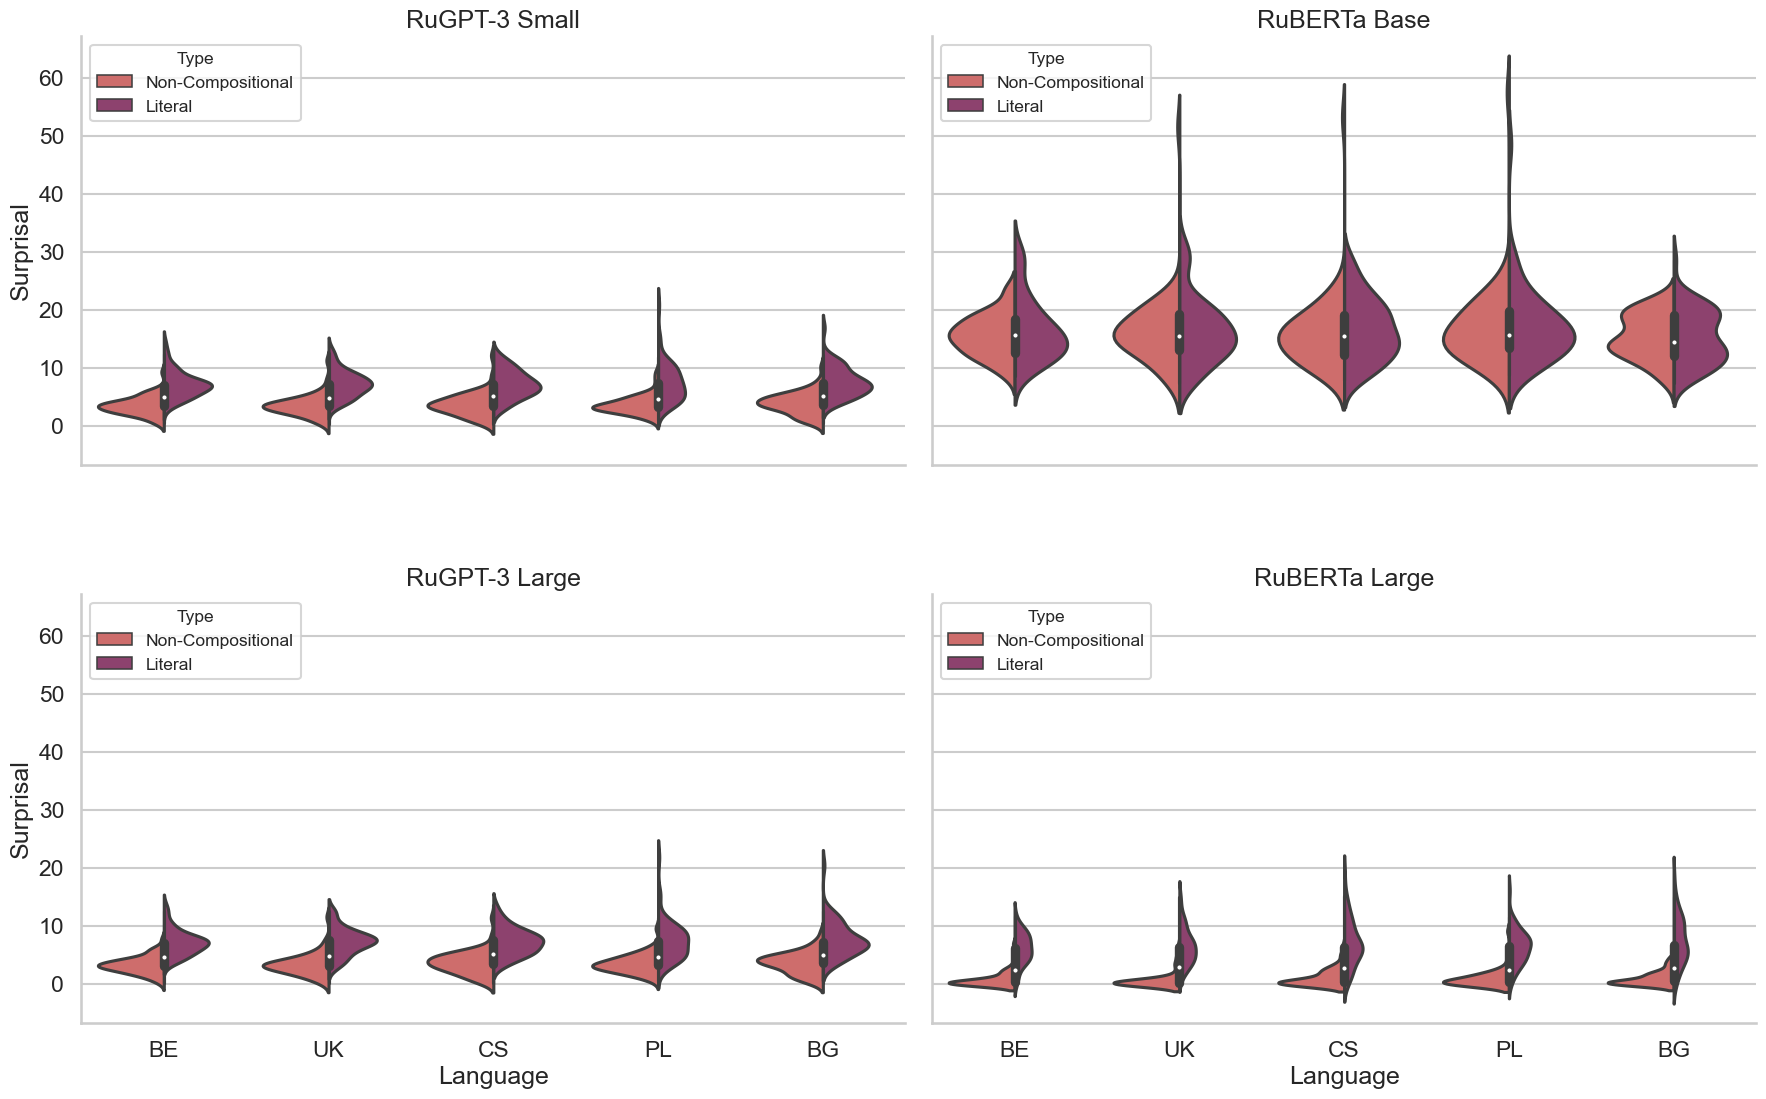

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... [Your previous code here]

# Ensure the order of 'language' is as desired
ordered_languages = ['BE', 'UK', 'CS', 'PL', 'BG']
df_melted['language'] = pd.Categorical(df_melted['language'], categories=ordered_languages, ordered=True)

# Plotting without legend
g = sns.catplot(data=df_melted, x="language", y="Surprisal", col="model",
                hue="Metric", kind="violin", split=True, palette="flare", height=6, aspect=1.5, col_wrap=2, legend=False)

# Adding titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("", "Surprisal")

# Explicitly setting x-tick labels
g.set(xticks=range(len(ordered_languages)), xticklabels=ordered_languages)

# Adding a legend to each subplot
for ax in g.axes.flat:
    ax.legend(title='Type', loc='upper left', fontsize='x-small', title_fontsize='x-small')

# Adding x-axis labels to all subplots
for ax in g.axes.flat:
    ax.set_xlabel("Language")

# Adjusting the layout
plt.subplots_adjust(top=0.9, hspace=0.3)  # Adjust hspace for better visibility of the secondary x-axis labels

# Save the plot in a suitable format
plt.savefig("results/surprisal_violin_plot.pgf", bbox_inches='tight')

# Show the plot
plt.show()


In [105]:
# Assuming result_dict is defined somewhere above in your code
was_dict = {
    # Your result_dict content here
}

# Initialize a dictionary to store the DataFrames
dfs = {}

l2s = ['bg', 'be', 'uk', 'cs', 'pl']

for l2 in l2s:
    #print(l2)
    
    # Define the paths to your saved CSV files
    path_ru_l2 = f'data/metrics/was/was_literal_ru_{l2.lower()}.csv'
    path_l2_ru = f'data/metrics/was/was_literal_{l2.lower()}_ru.csv'
    
    # Read the CSV files into DataFrames and store them in the dfs dictionary
    dfs[f'was_literal_ru_{l2.lower()}'] = pd.read_csv(path_ru_l2)
    dfs[f'was_literal_{l2.lower()}_ru'] = pd.read_csv(path_l2_ru)

# Now, dfs is a dictionary where the keys are the names of your DataFrames 
# and the values are the DataFrames themselves. You can access a DataFrame like this:
# df = dfs['was_literal_ru_bg']

# Example: Display the first few rows of a DataFrame